In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
yelp_reviews_original = pd.read_csv("/Users/brandonwu/Downloads/yelp_review_data.csv")
yelp_reviews = yelp_reviews_original.drop(["review_id", "user_id", "business_id", "useful", "funny", "cool", "date"], axis=1)
yelp_reviews = yelp_reviews.head(500000)

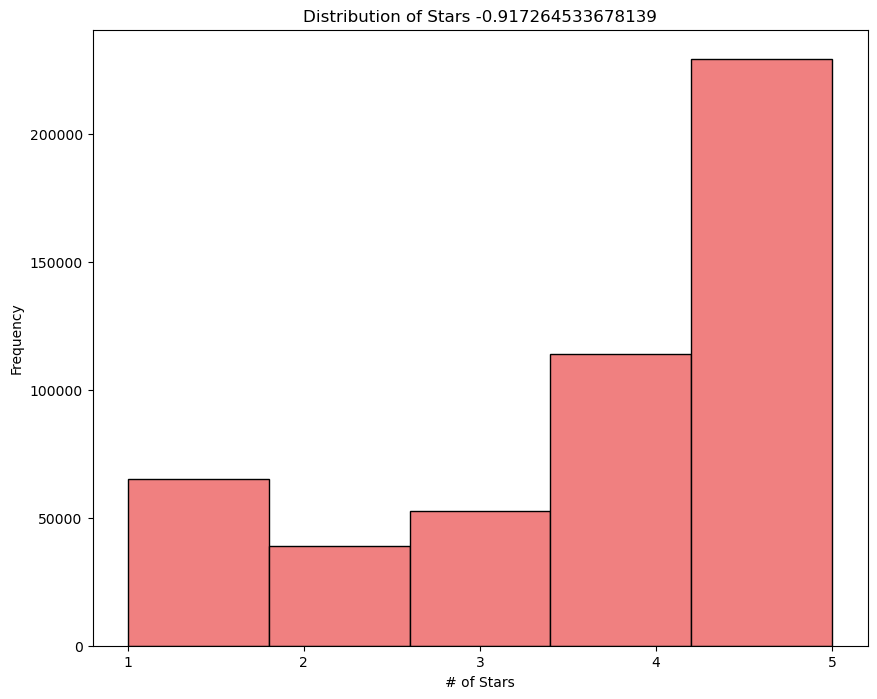

In [3]:
# Distribution of Stars
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(yelp_reviews["stars"], color="lightcoral", bins=5, edgecolor="black")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("# of Stars")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of Stars {yelp_reviews['stars'].skew()}")
plt.show()

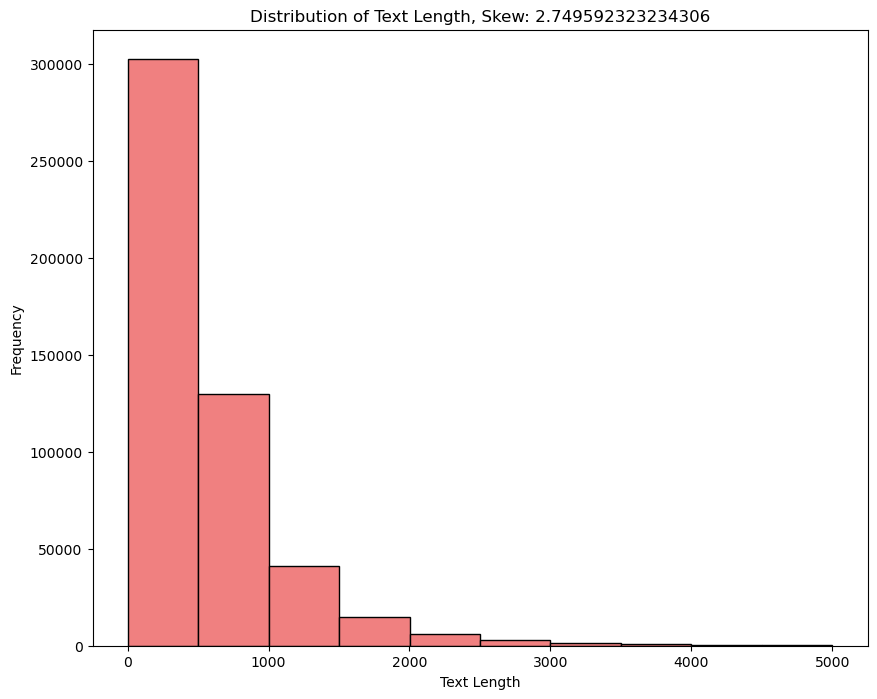

In [4]:
# Distribution of text length
yelp_reviews["text"] = yelp_reviews["text"].astype("string") # Convert from object to pandas string type
text_lens = yelp_reviews["text"].str.len()

fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(text_lens, color="lightcoral", edgecolor="black")
ax.set_xlabel("Text Length")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of Text Length, Skew: {text_lens.skew()}")
plt.show()

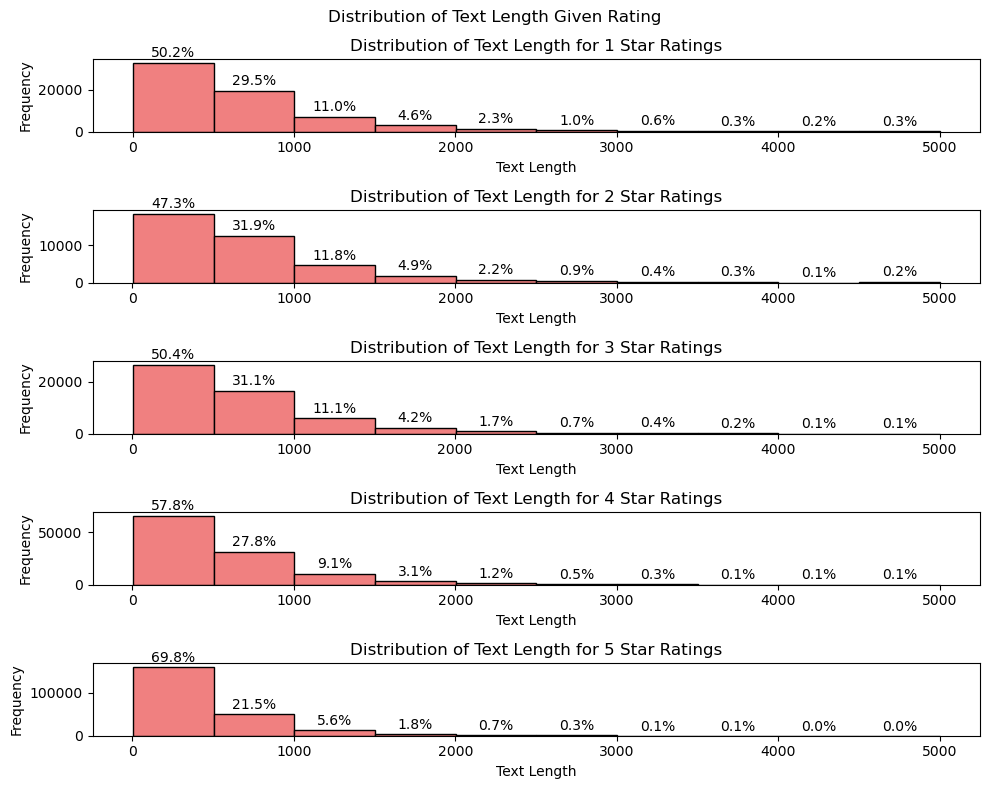

In [5]:
# 5 plots for each star and the distribution of text length for each
# y-axis: frequency 
# Add a percentage

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

counter = 1
for i in range(5):
    num_stars = yelp_reviews[yelp_reviews["stars"] == counter]
    text_length = num_stars["text"].str.len()
    counts, bins, patches = axes[i].hist(text_length, color="lightcoral", edgecolor="black")
    total_data_points = len(num_stars["text"])

    for j in range(len(counts)):
        if counts[j] > 0:  
            percentage = (counts[j] / total_data_points) * 100 
 
            axes[i].text(
                bins[j] + (bins[j + 1] - bins[j]) / 2,  
                counts[j] + 0.02 * total_data_points,  
                f'{percentage:.1f}%',  
                ha='center', 
                va='bottom',  
                fontsize=10
            )

    axes[i].set_xlabel("Text Length")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Distribution of Text Length for {counter} Star Ratings")

    counter += 1

fig.suptitle("Distribution of Text Length Given Rating")
plt.tight_layout()
plt.show()
